# DEMO

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'scripts'))

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from math import sqrt
from attack import attacks
from detection import detection
from embedding import *



#WPSNR funzione
def wpsnr(img1, img2):
  img1 = np.float32(img1)/255.0
  img2 = np.float32(img2)/255.0
  difference = img1-img2
  same = not np.any(difference)
  if same is True:
      return 150
  w = np.genfromtxt('csf.csv', delimiter=',')
  ew = convolve2d(difference, np.rot90(w,2), mode='valid')
  decibels = 20.0*np.log10(1.0/sqrt(np.mean(np.mean(ew**2))))
  return decibels

## Embedding

Embedding at level 1
Embedding at level 2
WPSNR:  37.16482602238253


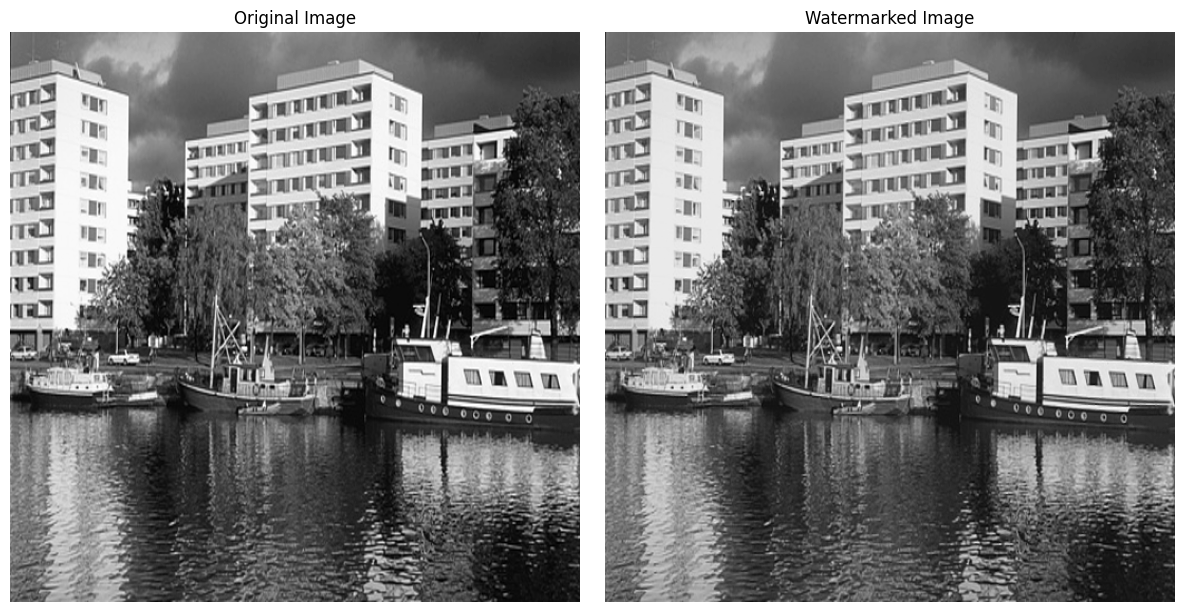

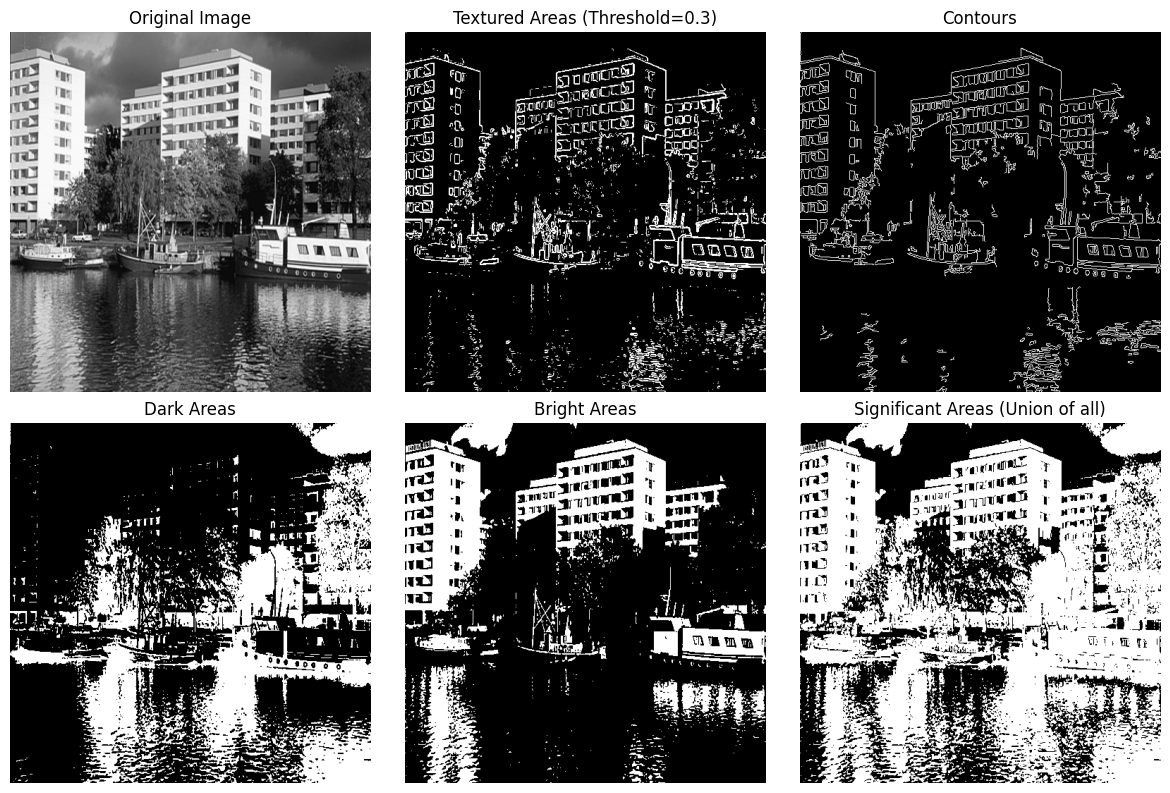

In [2]:

watermark = np.load('mediavault.npy')

image_path = './images/0099.bmp'

watermarked_image = embedding(image_path, watermark)


original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_wpsnr=wpsnr(original_image, watermarked_image)
print("WPSNR: ", image_wpsnr)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 3, 2) 
plt.imshow(watermarked_image, cmap='gray')
plt.title('Watermarked Image')
plt.axis('off')

plt.tight_layout()
plt.show() 

plot_identified_areas(original_image)



## Attack

In [3]:
#attacked_image = attacks(watermarked_image, 'blur', 3)
#attacked_image = attacks(watermarked_image, 'awgn', [10, 42])
#attacked_image = attacks(watermarked_image, 'sharpening', [0.5, 0.7])
#attacked_image = attacks(watermarked_image, 'median', 3)
attacked_image = attacks(watermarked_image, 'resize', 0.5)
#attacked_image = attacks(watermarked_image, 'jpeg', 5)
#attacked_image = attacks(watermarked_image, ['resize','blur'], [0.75,1])

## Detection

c:\Users\eddie\Downloads\LAB 1 - Rules and Venv\LAB1_CODE\Multimedia-Data-Security\scripts\detection.py:92: RuntimeWarning: divide by zero encountered in scalar divide
  extracted_val = (LH_test[loc] / LH[loc] - 1) / alpha
c:\Users\eddie\Downloads\LAB 1 - Rules and Venv\LAB1_CODE\Multimedia-Data-Security\scripts\detection.py:92: RuntimeWarning: invalid value encountered in scalar divide
  extracted_val = (LH_test[loc] / LH[loc] - 1) / alpha
c:\Users\eddie\Downloads\LAB 1 - Rules and Venv\LAB1_CODE\Multimedia-Data-Security\scripts\detection.py:100: RuntimeWarning: invalid value encountered in cast
  extracted_mark = np.round(extracted_mark).astype(int)


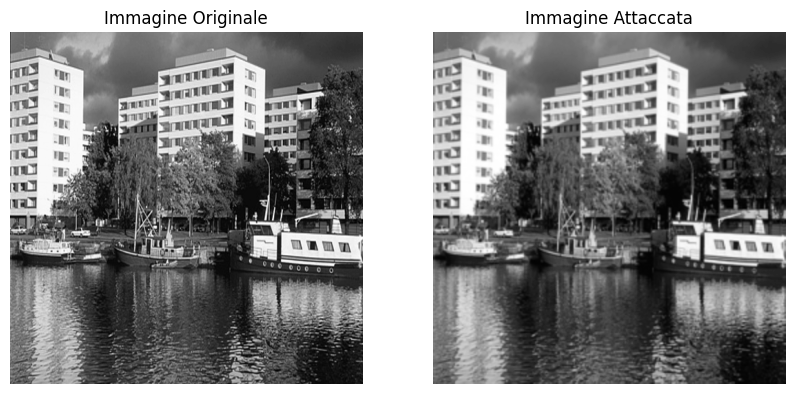

Il watermark è stato distrutto.
WPSNR tra l'immagine watermarked e quella attaccata: 16.80083174946388 dB


In [4]:
output1, output2 = detection(original_image, watermarked_image, attacked_image)

plt.figure(figsize=(10, 5))

# Plotta l'immagine originale
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')

# Plotta l'immagine attaccata
plt.subplot(1, 2, 2)
plt.imshow(attacked_image, cmap='gray')
plt.title('Immagine Attaccata')
plt.axis('off')

# Mostra il plot
plt.show()


# 3. Mostra i risultati della detection
if output1 == 1:
    print("Il watermark è presente nell'immagine attaccata.")
else:
    print("Il watermark è stato distrutto.")

print(f"WPSNR tra l'immagine watermarked e quella attaccata: {output2} dB")

## ROC

Immagine 0001.bmp caricata con successo.
Embedding at level 1
Embedding at level 2
Attacco scelto: Blur


C:\Users\eddie\AppData\Local\Temp\ipykernel_12424\2113268856.py:20: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Ridimensionato wat_attacked a (20437,)


ValueError: operands could not be broadcast together with shapes (1024,) (20437,) 